In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
# bank_decision_tree.py

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import tree




In [5]:
df = pd.read_csv("bank-full.csv", sep=';')
print("Data loaded successfully!\n")

Data loaded successfully!



In [6]:
# Step 3: Basic Exploration
print("First 5 rows of data:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

First 5 rows of data:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Dataset shape: (45211, 17)

Missing values:
 age          0
job          0
marital      

In [7]:
# Step 4: Encode Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nData after encoding:\n", df.head())

# Step 5: Define Features (X) and Target (y)
X = df.drop("y", axis=1)  # Features
y = df["y"]               # Target


Data after encoding:
    age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [8]:
# Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Build Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)
print("\nModel training completed.")


Model training completed.


In [9]:
# Step 8: Predictions
y_pred = model.predict(X_test)

In [10]:
# Step 9: Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[11131   835]
 [  858   740]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.47      0.46      0.47      1598

    accuracy                           0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.87      0.88      0.87     13564


Accuracy Score: 0.8751843114125627


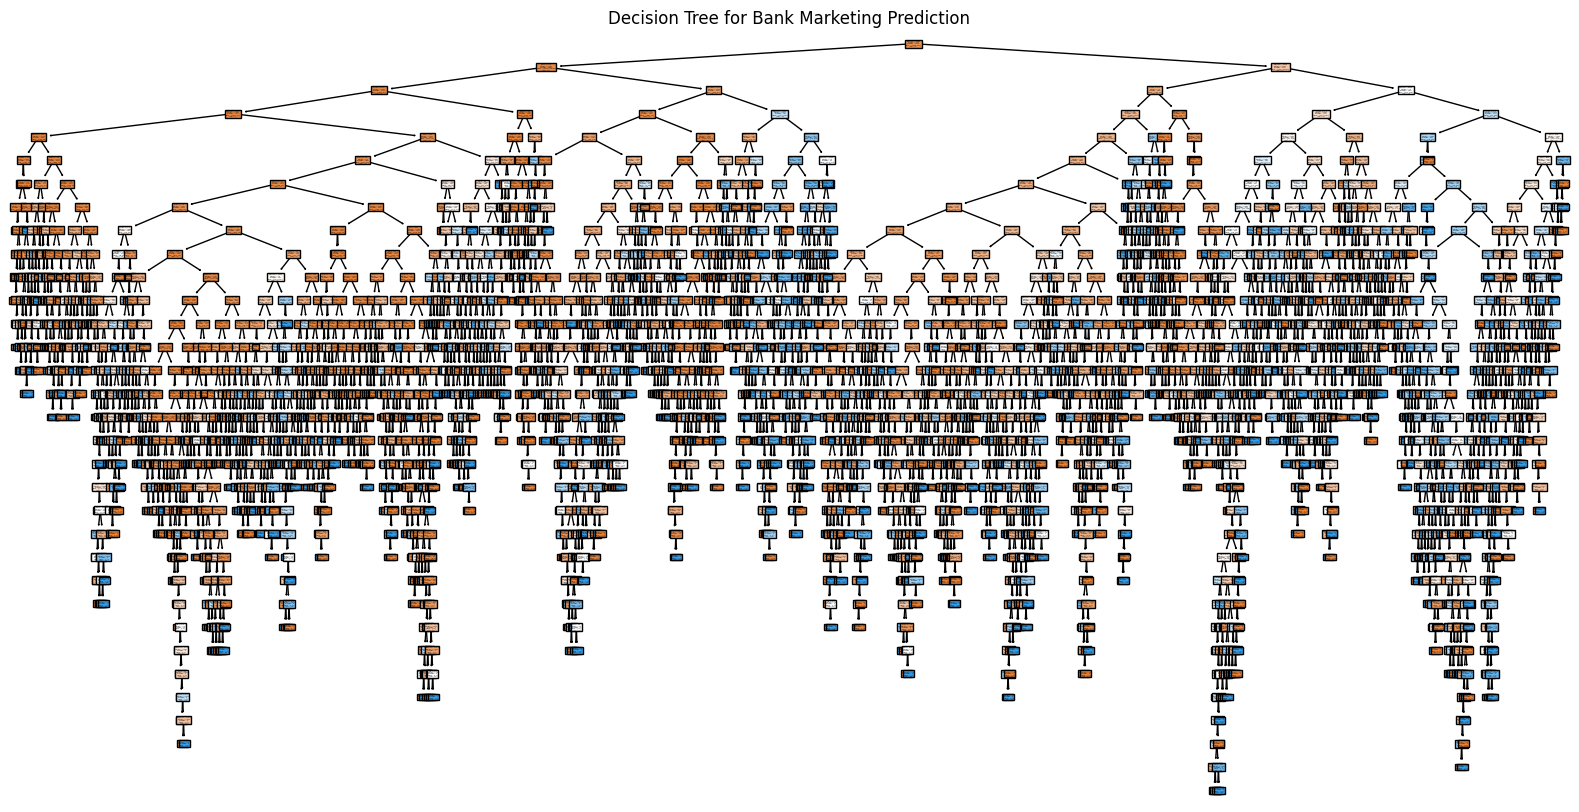

In [11]:
# Step 10: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree for Bank Marketing Prediction")
plt.show()